# Random Forests

Random Forest is an ensemble learning technique that combines multiple decision trees to improve the accuracy and robustness of machine learning models.

### Ensemble Learning

Ensemble learning is a machine learning approach that combines the predictions of multiple models to make more accurate predictions than individual models. Random Forests are an ensemble of decision trees.

### Random Forest Algorithm

1. **Bootstrapping (Random Sampling with Replacement)**: Random Forests start by creating multiple bootstrap samples from the original dataset. Each bootstrap sample is created by randomly selecting data points with replacement. This process generates several subsets of the data.

2. **Building Decision Trees:** For each bootstrap sample, a decision tree is constructed. However, there's a slight modification in the process:
    1. At each node of the decision tree, instead of considering all features to split on, Random Forests select a random subset of features to consider for splitting. This introduces randomness and diversity among the trees.

    2. The tree-building process continues until a predefined stopping criterion is met, such as a maximum depth or a minimum number of samples per leaf.

3. **Voting or Averaging:** Once all decision trees are built, predictions are made for each tree. For classification tasks, each tree's prediction is treated as a vote, and the class with the most votes becomes the final prediction. For regression tasks, each tree's prediction is averaged to obtain the final prediction.

### Advantages of Random Forests

**Reduced Overfitting**: Random Forests are less prone to overfitting compared to individual decision trees due to the ensemble nature of the algorithm.

**Improved Generalization**: The ensemble of diverse trees leads to better generalization and increased model accuracy.

**Feature Importance**: Random Forests can provide a measure of feature importance, helping identify the most relevant features in the dataset.

**Robustness**: They perform well on a wide range of data types and can handle missing values and outliers.

### Mathematics Behind Random Forests

1. **Bootstrapping Probability**:
    1. Let's say you have N data points. When creating a bootstrap sample, each data point has a probability of 1/N of being selected.

    2. The probability of a data point not being selected in a bootstrap sample is (1 - 1/N).

    3. When creating a bootstrap sample of size N (with replacement), the probability that a specific data point is not selected in that sample is ((1 - 1/N)^N).

    4. As N approaches infinity, the probability of a specific data point not being selected approaches 1/e, where 'e' is Euler's number (approximately 2.71828).

### Tree Diversity:

1. Random Forests introduce diversity among trees by selecting a random subset of features at each node.

2. This randomness ensures that each tree is slightly different from the others, reducing overfitting.

### Ensemble Predictions:

For classification, the ensemble prediction is the majority vote among individual tree predictions. For regression, the ensemble prediction is the average of individual tree predictions.



*************************************************************************

# Project Title: Wine Quality Classification with Random Forest

### Description:

In the "Wine Quality Classification with Random Forest" project, we employ machine learning to predict the quality of wines based on a set of chemical attributes. This project leverages the Random Forest classifier, a powerful ensemble learning algorithm, to build a robust model capable of accurately classifying wine quality.

### Project Overview:

Wine quality assessment is a vital task in the wine industry, where the quality of wine is influenced by various chemical factors such as acidity, sulfur dioxide levels, and alcohol content. By harnessing the potential of machine learning, we aim to create a model that can help classify wines into different quality categories.

### Key Components:

**Dataset**: We utilize the Wine Quality Dataset, a publicly available dataset containing attributes such as fixed acidity, volatile acidity, citric acid, and more, along with quality ratings for a variety of red wines.

**Feature Selection**: We carefully choose a subset of essential chemical attributes (e.g., fixed acidity, citric acid, alcohol) as features for our model to make accurate predictions regarding wine quality.

**Random Forest Classifier**: The Random Forest algorithm is the heart of our project. It constructs an ensemble of decision trees, each trained on a different subset of the data. This ensemble approach helps improve prediction accuracy and mitigates overfitting.

**Data Splitting**: We split the dataset into training and testing sets to train the model on one portion of the data and evaluate its performance on another unseen portion.

**Model Training**: The Random Forest classifier is trained on the training data, learning the relationships between the selected chemical attributes and wine quality.

**Predictions**: Using the trained model, we make predictions on the testing data to assess the model's ability to classify wine quality accurately.

**Evaluation**: We measure the model's performance using metrics such as accuracy, precision, recall, and F1-score. These metrics provide insights into how well the model performs in categorizing wine quality.

### Project Goals:

1. Build a predictive model that can classify wine quality based on chemical attributes.

2. Evaluate the model's performance and understand its strengths and weaknesses.

3. Gain insights into which chemical factors most strongly influence wine quality.

### Applications:

The results of this project can have practical applications in the wine industry. Winemakers and producers can use such models to assess and improve the quality of their products, ensuring consistency and meeting customer expectations.

### Import Necessary Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

### EDA

In [2]:
# Load the Wine Quality Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, sep=';')

dsiplay the dataset

In [3]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No missing values

In [5]:
# Summary statistics
print("Summary Statistics:")
print(wine_data.describe())

Summary Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000          

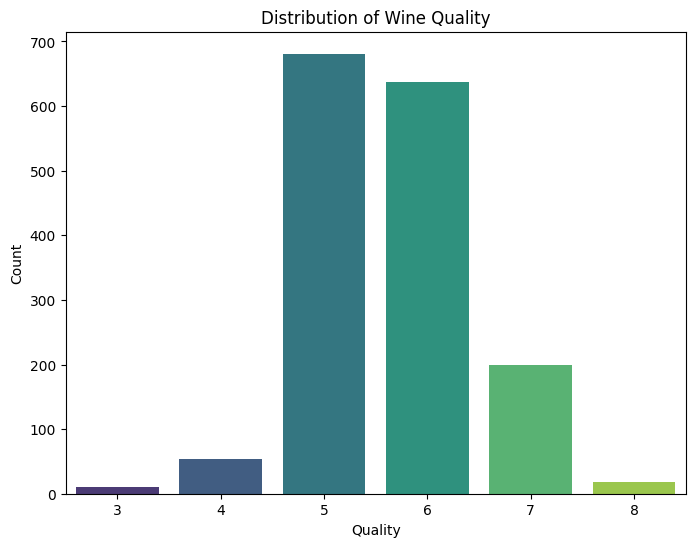

In [10]:
# Distribution of wine quality
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=wine_data, palette='viridis')
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

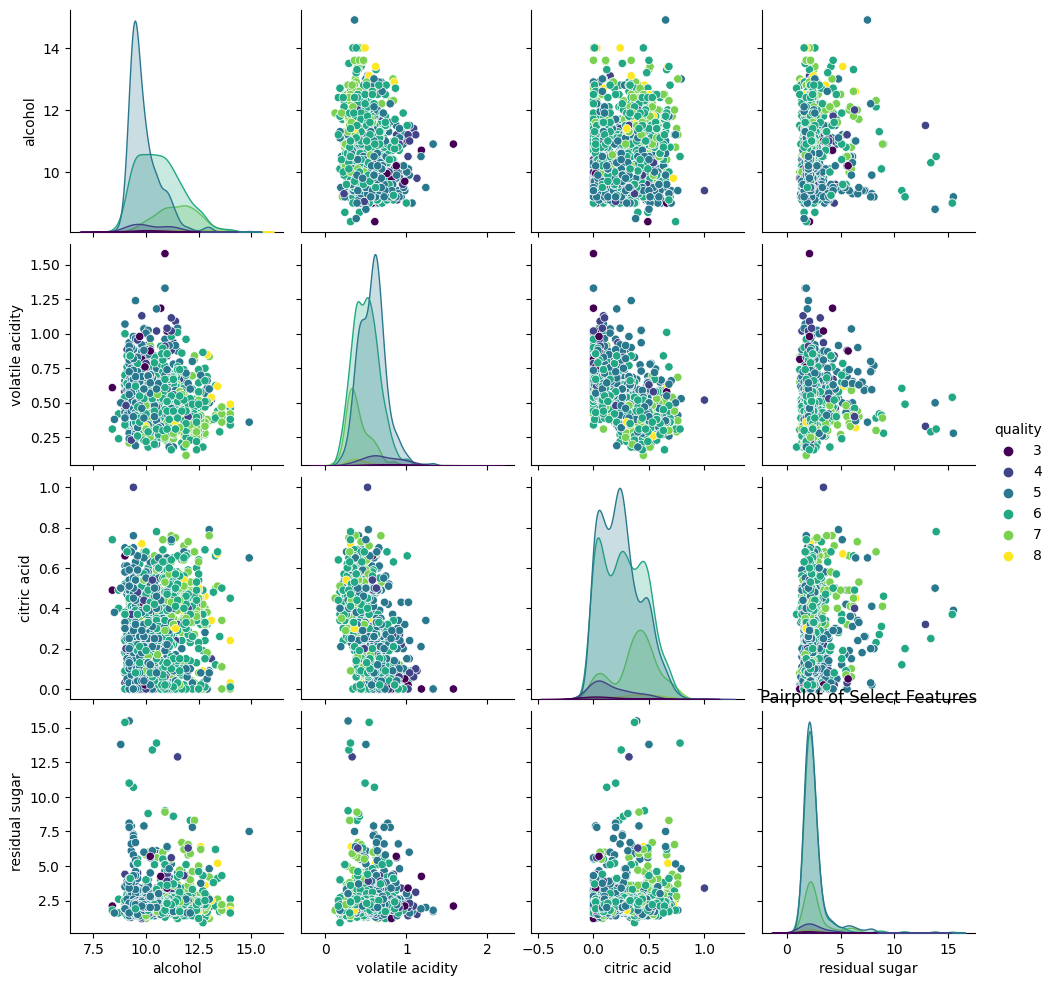

In [11]:
# Pairplot for select features
select_features = ['alcohol', 'volatile acidity', 'citric acid', 'residual sugar', 'quality']
sns.pairplot(wine_data[select_features], hue='quality', palette='viridis')
plt.title("Pairplot of Select Features")
plt.show()

### Model Building and Training

In [13]:
# Define features (X) and target variable (y)
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol']
X = wine_data[features]
y = wine_data['quality']

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [16]:
# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

### Evaluation



In [18]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.659375
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.72      0.75      0.73       130
           6       0.63      0.69      0.66       132
           7       0.63      0.52      0.57        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.63      0.66      0.64       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
